# Models by Uniaxial Composition

In [1]:
from opensees import uniaxial

In [2]:
from numpy import linspace, logspace, sin, cos, pi
import matplotlib.pyplot as plt
plt.style.use("typewriter")

In [3]:
strain = 0.02*sin(linspace(0, 4*pi, 300))*linspace(0.5, 1, 300)**2

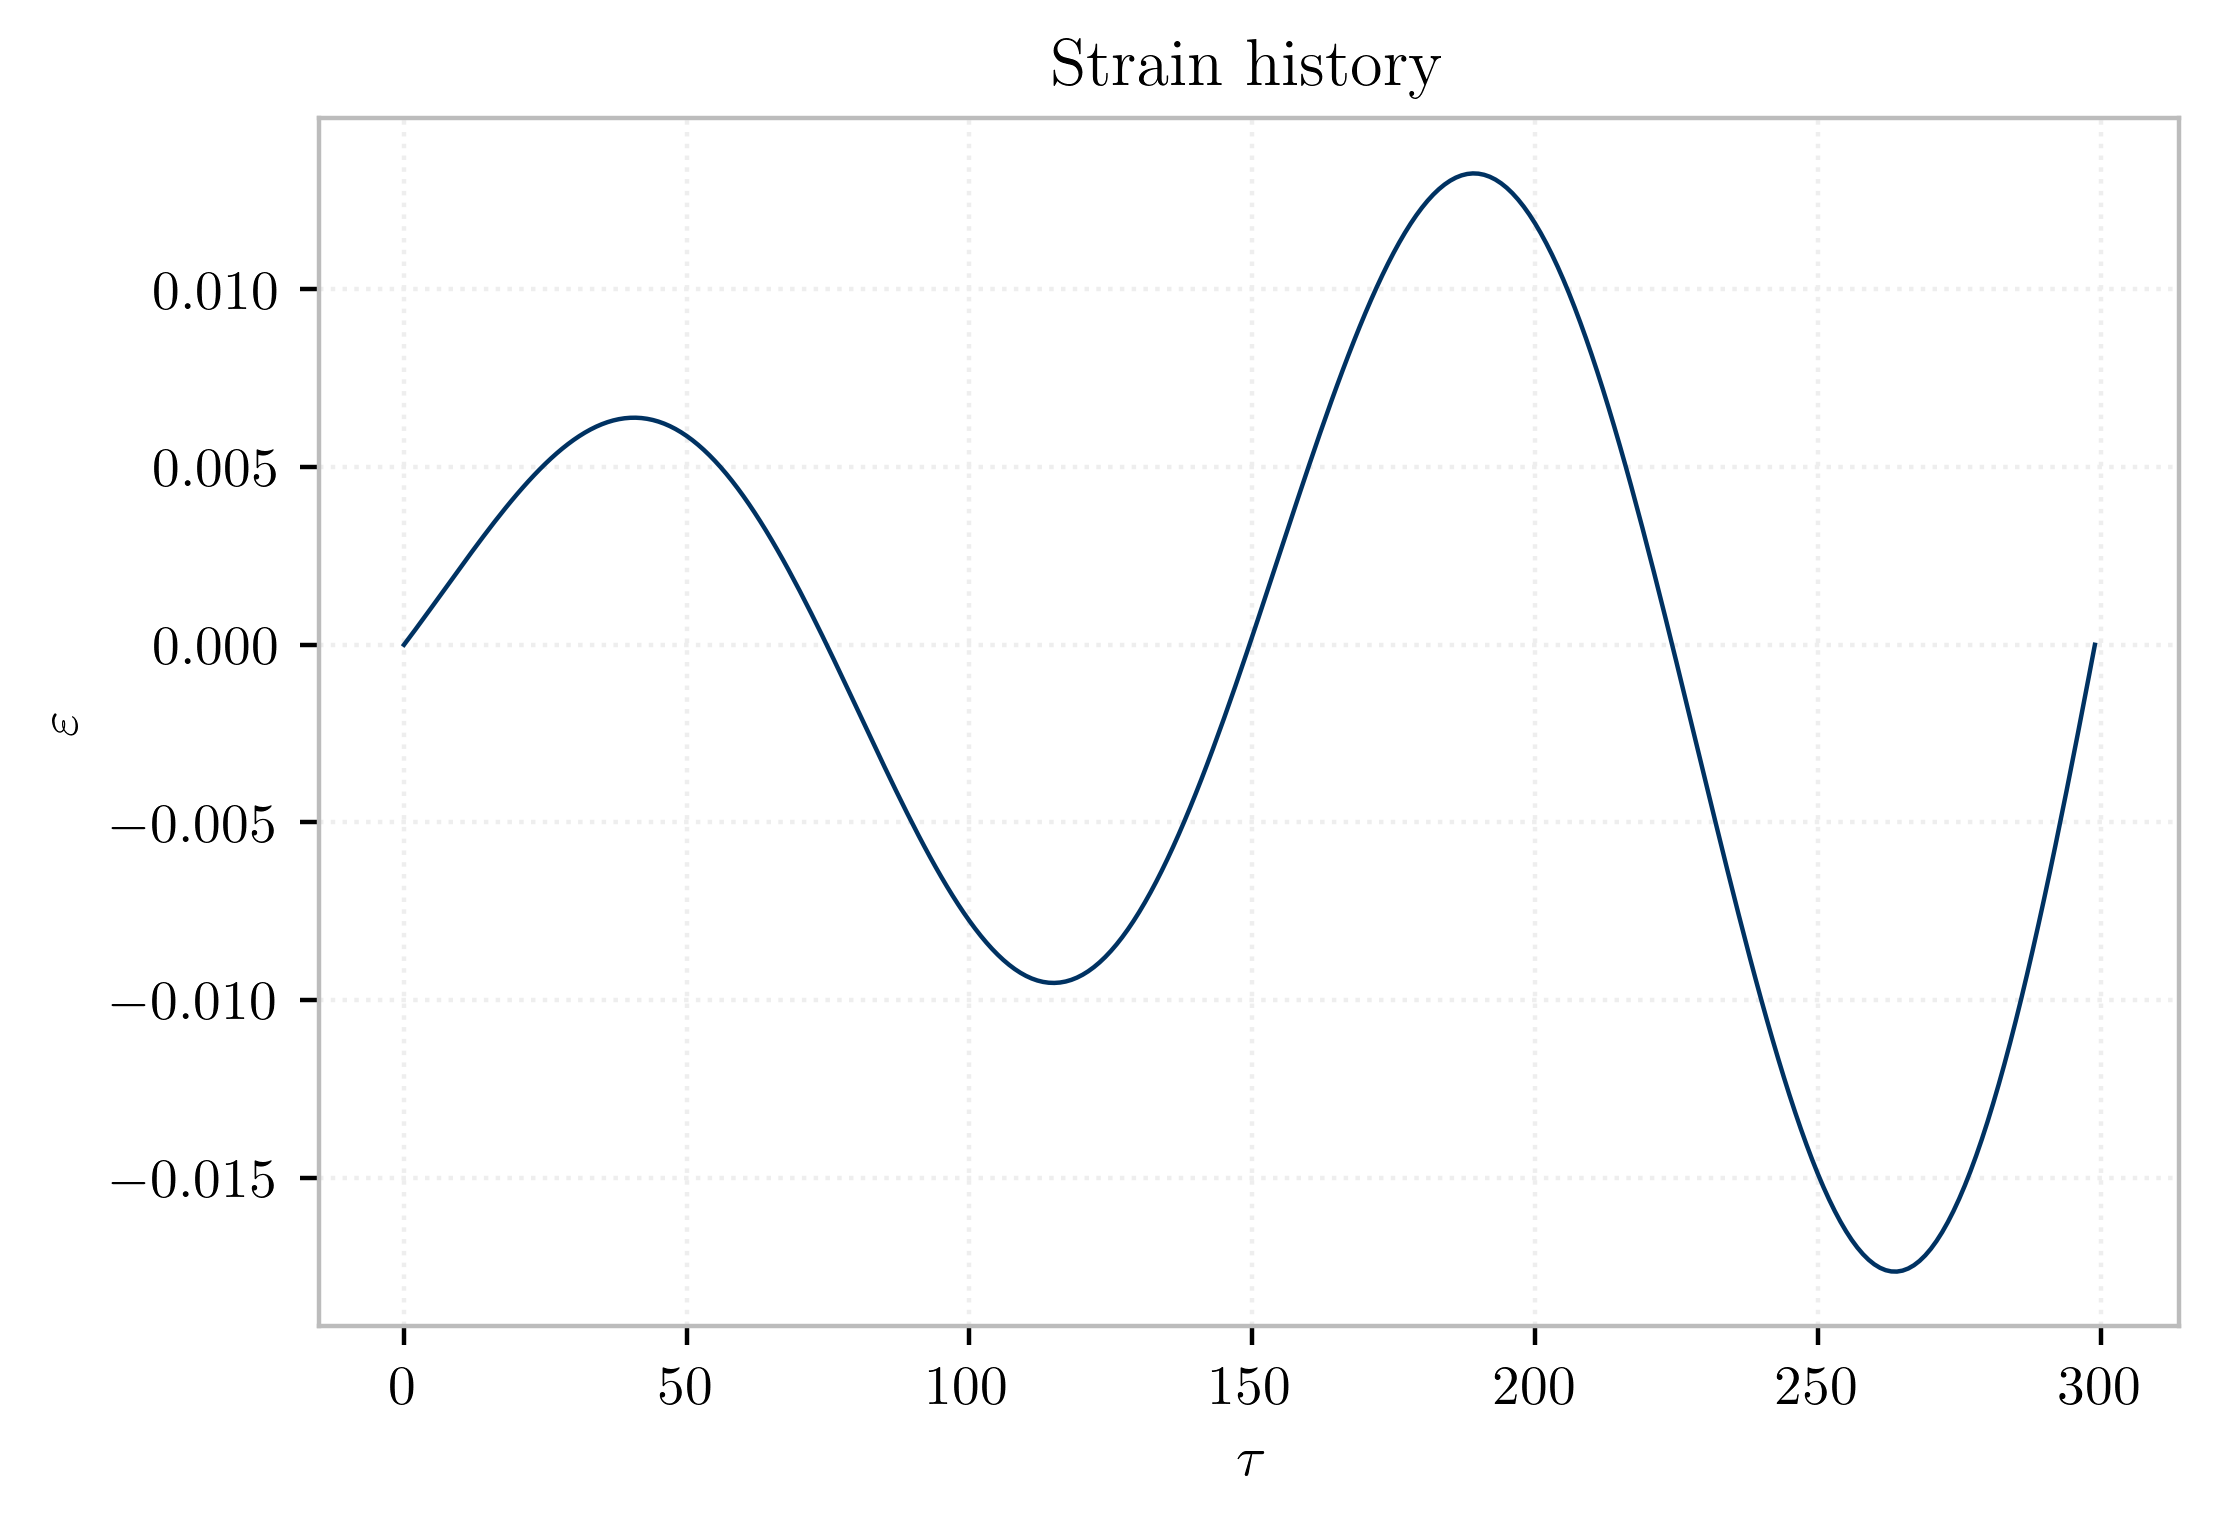

In [4]:
fig, ax = plt.subplots()
ax.plot(strain)
ax.set_xlabel(r"$\tau$")
ax.set_ylabel(r"$\varepsilon$")
ax.set_title("Strain history");

## Parallel Composition

### Bilinear Flag

In [5]:
mat_a = uniaxial.Hardening(1, 15e3, fy=15., H_iso=0., H_kin=5e1)
mat_b = uniaxial.ElasticBilin(2, 45e3, 1e2, 15/15e3)

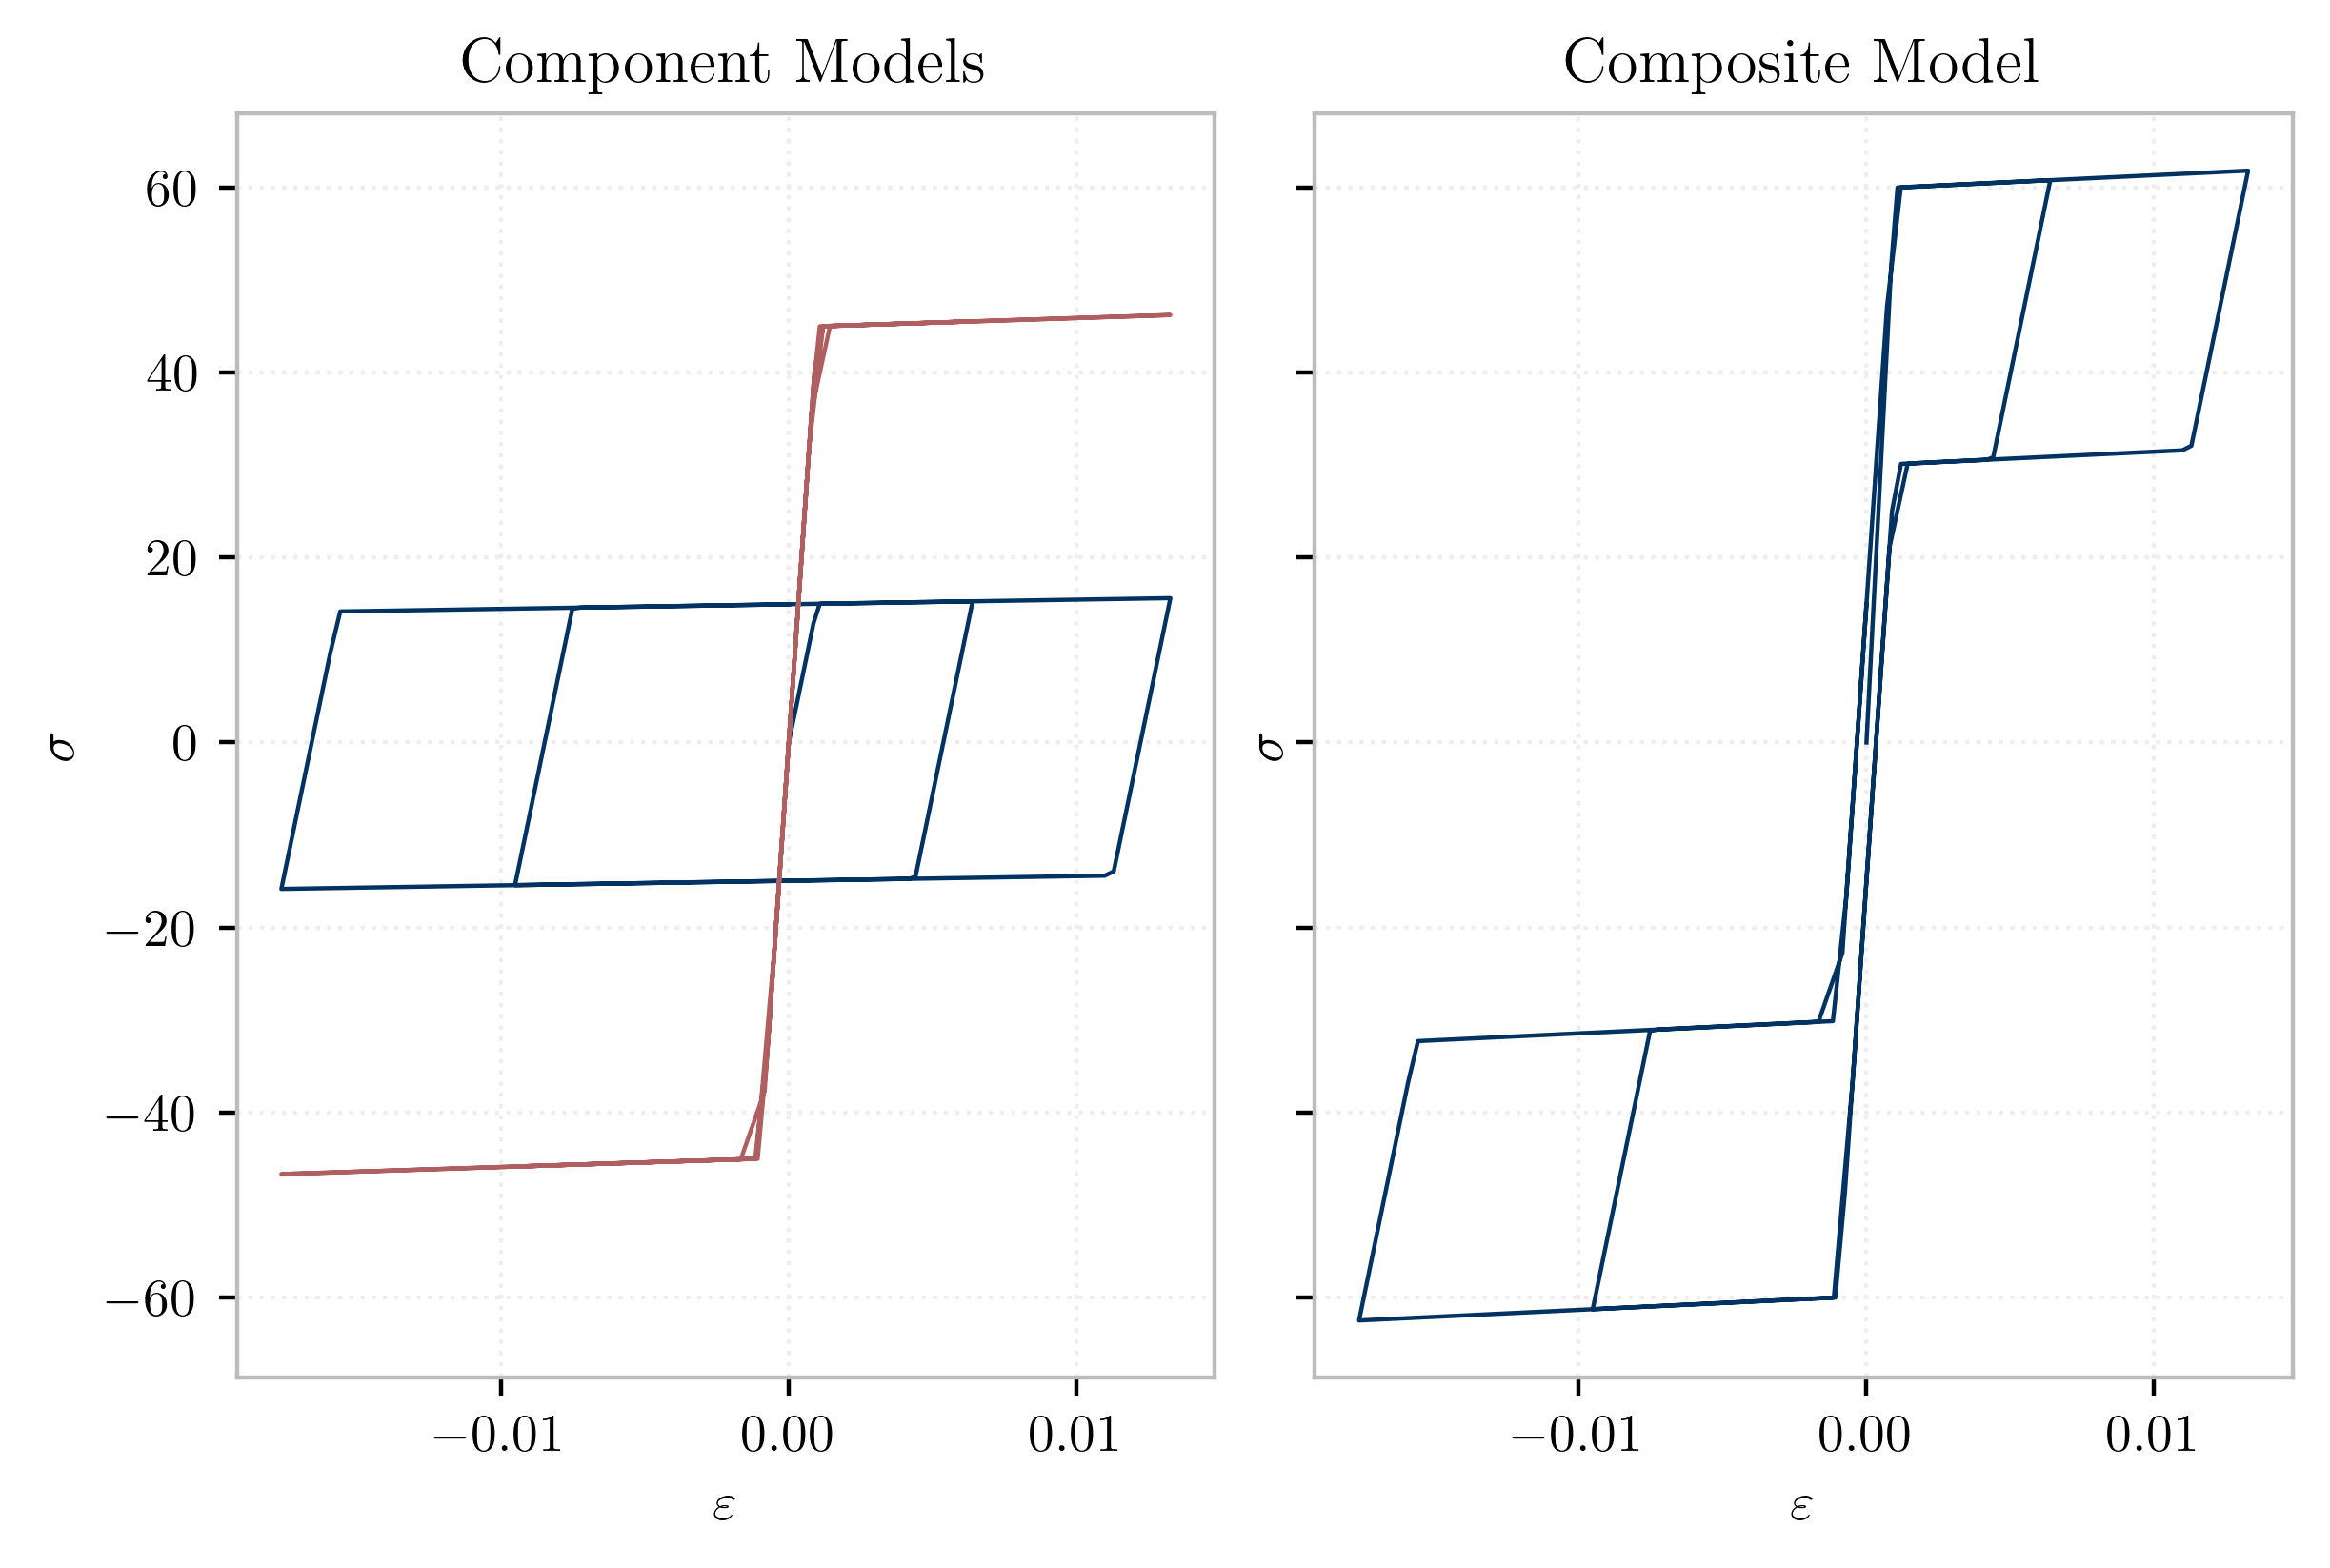

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, constrained_layout=True)

with mat_a as m:
    ax[0].plot(strain, [m.getStress(e, commit=True) for e in strain])

with mat_b as m:
    ax[0].plot(strain, [m.getStress(e, commit=True) for e in strain])


# with mat_a as m:
#     ax[0].plot(strain, [m.getStress(e, commit=True) for e in strain])
with uniaxial.Parallel(3, [mat_a, mat_b]) as m:
    ax[1].plot(strain, [m.getStress(e, commit=True) for e in strain])


ax[0].set_title("Component Models")
ax[1].set_title("Composite Model")
for a in ax:
    a.set_xlabel(r"$\varepsilon$");
    a.set_ylabel(r"$\sigma$");

## Series Composition

### Brittle Fracture

### Trilinear Response

In [7]:
mat_a = uniaxial.Hardening(1, 40e3, fy=40., H_iso=0., H_kin=5e3)
mat_b = uniaxial.Hardening(2, 30e3, fy=60., H_iso=0., H_kin=5e2)

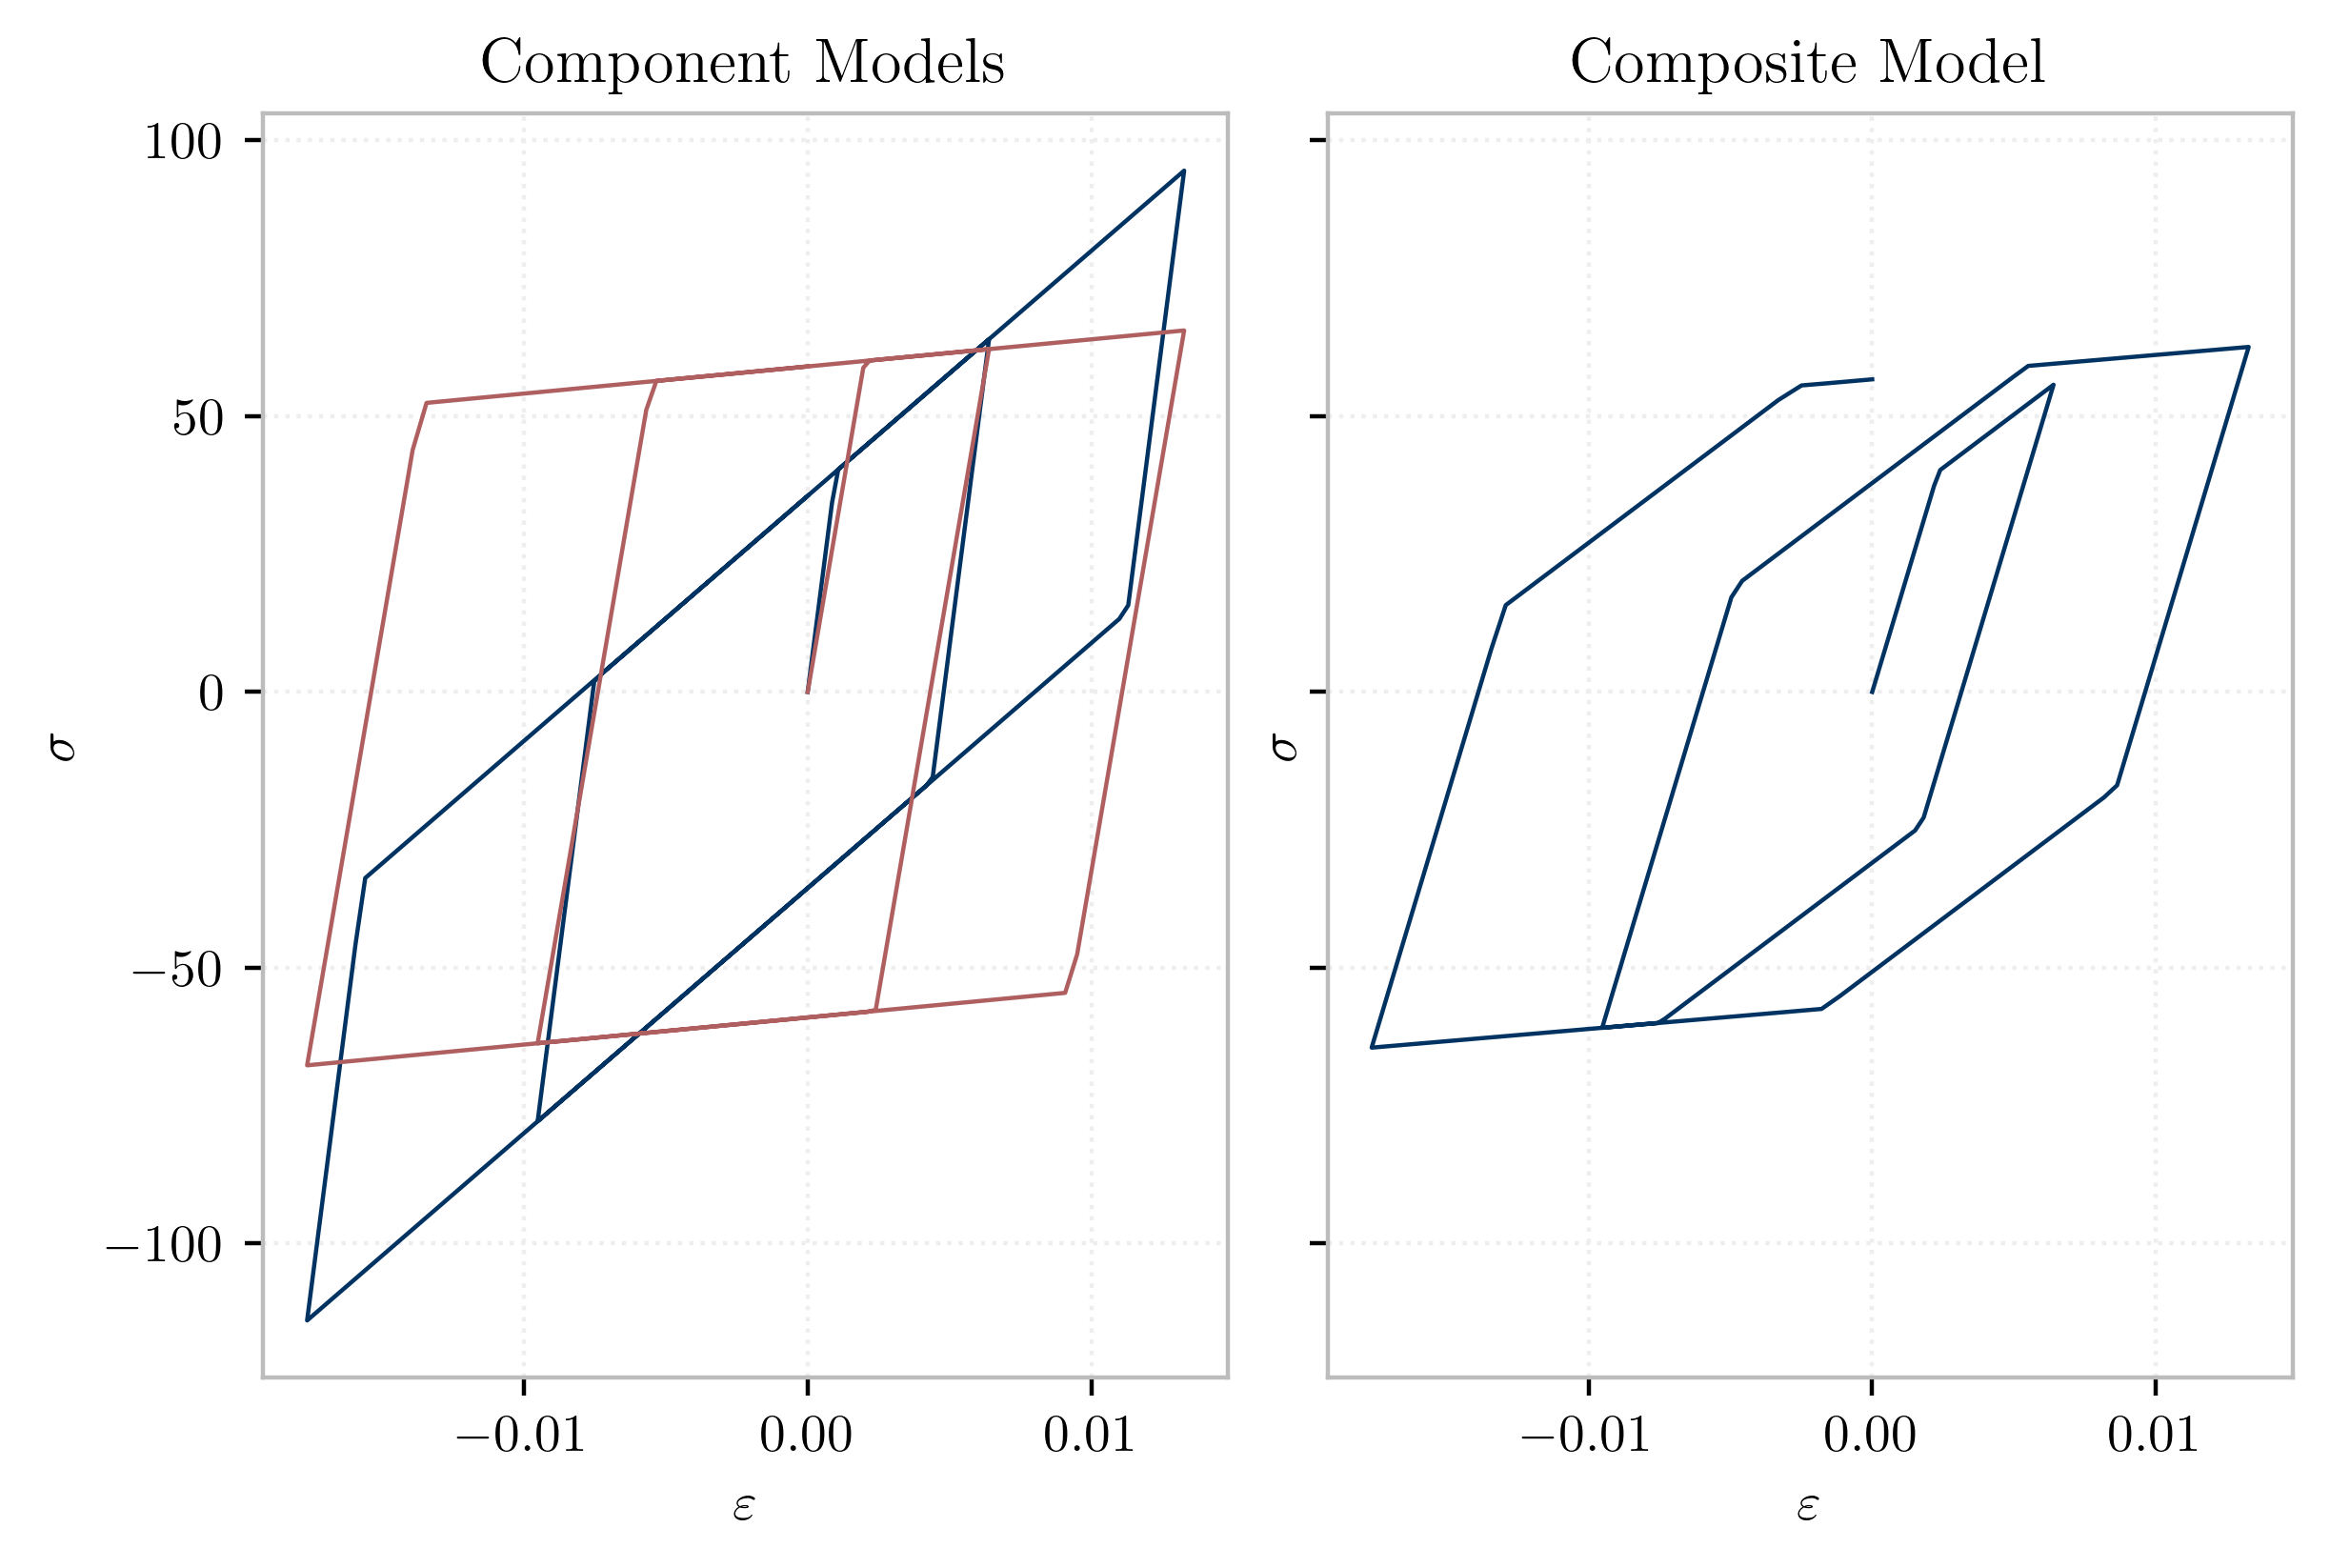

In [8]:
fig, ax = plt.subplots(1,2, sharey=True, constrained_layout=True)

with mat_a as m:
    ax[0].plot(strain, [m.getStress(e, commit=True) for e in strain])
    
with mat_b as m:
    ax[0].plot(strain, [m.getStress(e, commit=True) for e in strain])
    
with uniaxial.Series(3, [mat_a, mat_b]) as m:
    ax[1].plot(strain, [m.getStress(e, commit=True) for e in strain])

    
ax[0].set_title("Component Models")
ax[1].set_title("Composite Model")
for a in ax:
    a.set_xlabel(r"$\varepsilon$");
    a.set_ylabel(r"$\sigma$");

### Slipping

In [9]:
mat_a = uniaxial.Hardening(1, 30e3, fy=60., H_iso=0., H_kin=1e2)
mat_b = uniaxial.ElasticBilin(2, 10.0, 30e3, 0.01)

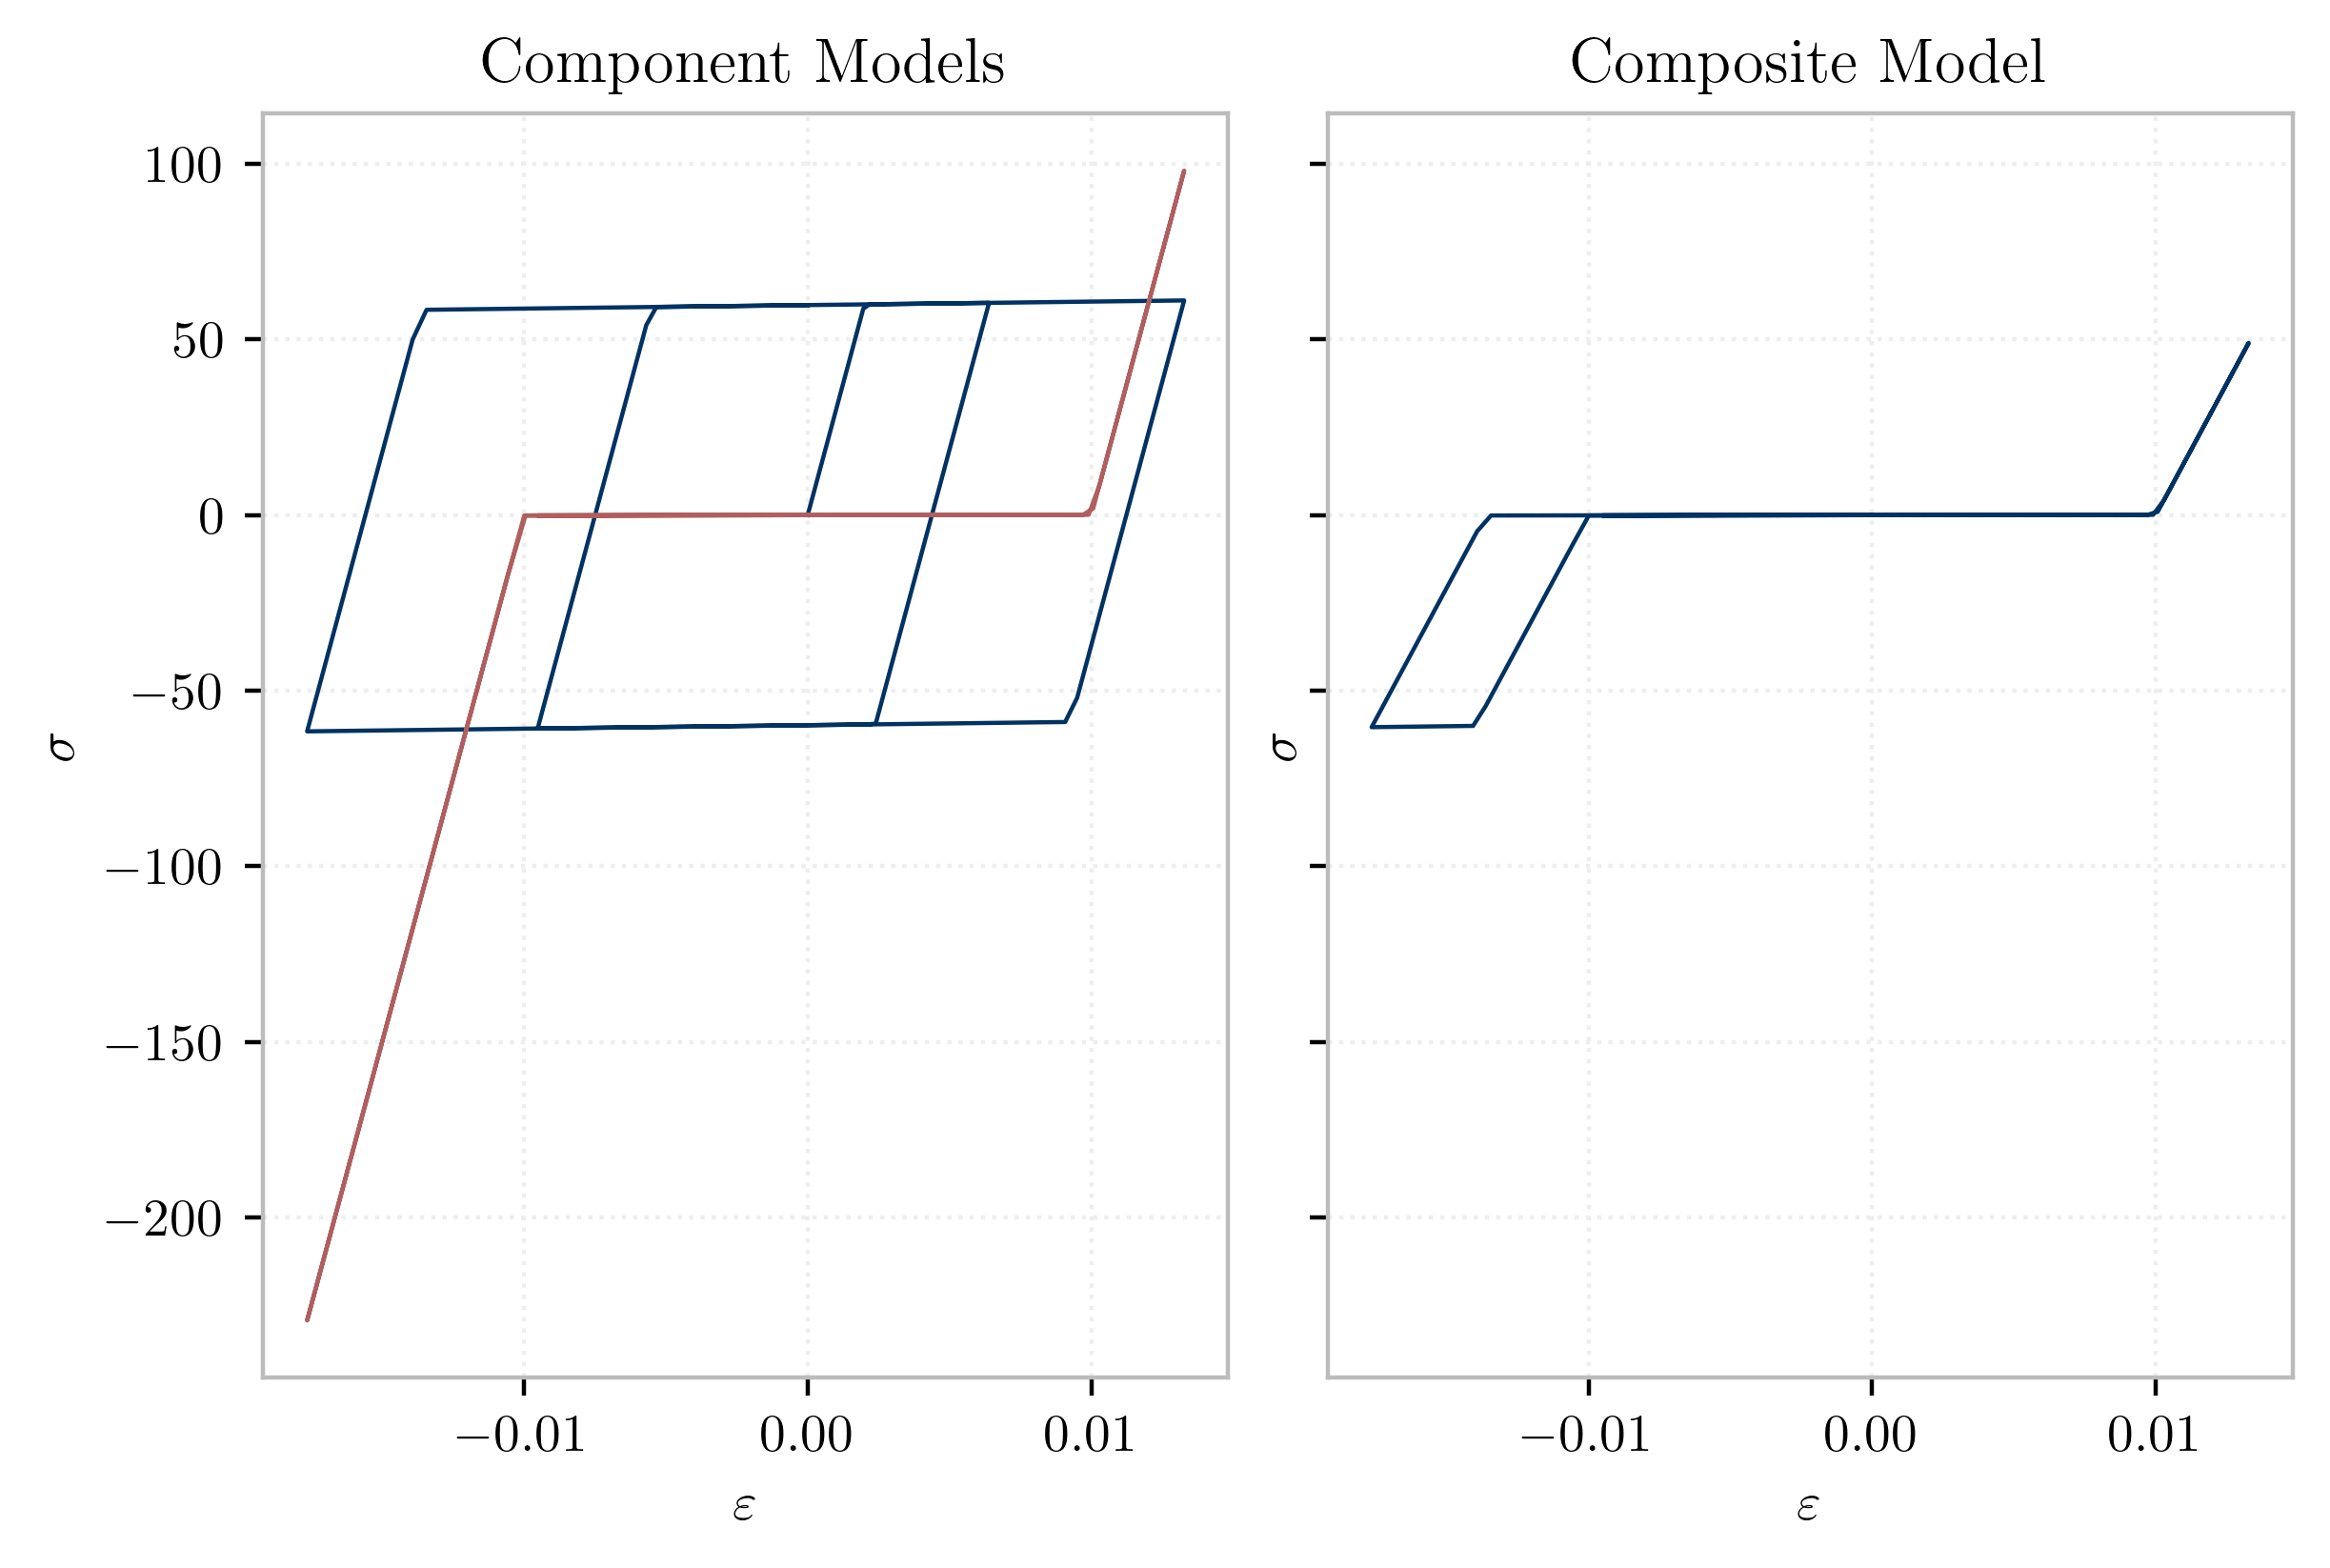

In [10]:
fig, ax = plt.subplots(1, 2, sharey=True, constrained_layout=True)

with mat_a as m:
    ax[0].plot(strain, [m.getStress(e, commit=True) for e in strain])
    
with mat_b as m:
    ax[0].plot(strain, [m.getStress(e, commit=True) for e in strain])

with uniaxial.Series(3, [mat_a, mat_b]) as m:
    ax[1].plot(strain, [m.getStress(e, commit=True) for e in strain])


ax[0].set_title("Component Models")
ax[1].set_title("Composite Model")
for a in ax:
    a.set_xlabel(r"$\varepsilon$");
    a.set_ylabel(r"$\sigma$");